In [1]:
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy.stats import invgamma
import logging

In [2]:
from notebookutils import root_dir, corr_plot; root_dir()

now in dir:  /Users/Jeppe/Projects/BayesFactorModel


In [3]:
from model.utils import read_clean_kv17, read_testdata1, read_party_keys, matrix, vector, party_name_from_key
from model.gibbssampler import GibbsSampler

In [4]:
np.random.seed(100)

In [5]:
data = read_clean_kv17(drop_party_key = True)
labels = read_party_keys()

In [6]:
data = matrix(data) #making testing different data set simple

(1215, 15)


In [7]:
sigma_array = np.array([np.random.normal()**2 for _ in range(15)])
F = np.matrix([np.random.normal(size=3) for _ in range(1215)])
Beta = np.matrix(np.random.normal(size=(15,3)))

In [8]:
gs = GibbsSampler(n_factors=3, data=data)
gs.add('Sigma',sigma_array)
gs.add('F', F)
gs.add('Beta',Beta)

number of variables: 15  number of observations: 1215


In [9]:
gs.sampler(1000)

2018-10-21 21:07:18,135 : INFO : Sampling begins
2018-10-21 21:07:18,594 : INFO : run 0 simulations
2018-10-21 21:07:22,584 : INFO : run 10 simulations
2018-10-21 21:07:26,341 : INFO : run 20 simulations
2018-10-21 21:07:30,680 : INFO : run 30 simulations
2018-10-21 21:07:34,541 : INFO : run 40 simulations
2018-10-21 21:07:38,228 : INFO : run 50 simulations
2018-10-21 21:07:41,993 : INFO : run 60 simulations
2018-10-21 21:07:45,994 : INFO : run 70 simulations
2018-10-21 21:07:49,753 : INFO : run 80 simulations
2018-10-21 21:07:53,493 : INFO : run 90 simulations
2018-10-21 21:07:57,290 : INFO : run 100 simulations
2018-10-21 21:08:01,199 : INFO : run 110 simulations
2018-10-21 21:08:05,056 : INFO : run 120 simulations
2018-10-21 21:08:08,512 : INFO : run 130 simulations
2018-10-21 21:08:11,942 : INFO : run 140 simulations
2018-10-21 21:08:15,520 : INFO : run 150 simulations
2018-10-21 21:08:19,279 : INFO : run 160 simulations
2018-10-21 21:08:22,956 : INFO : run 170 simulations
2018-10-

In [10]:
gs

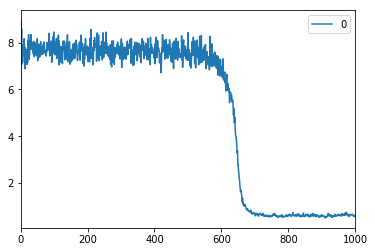

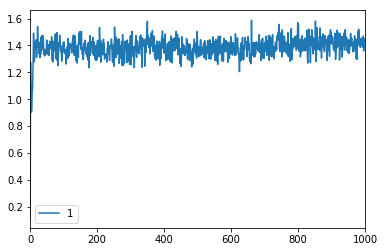

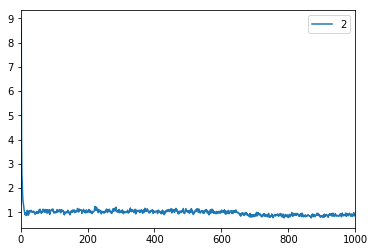

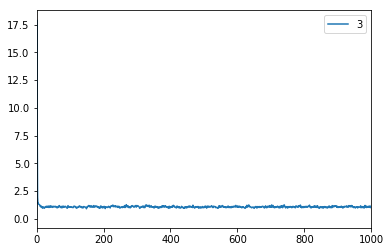

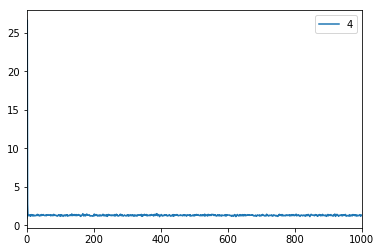

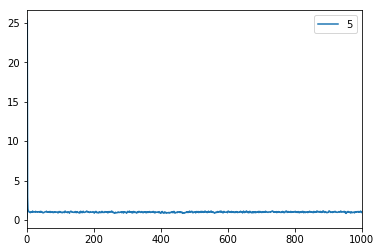

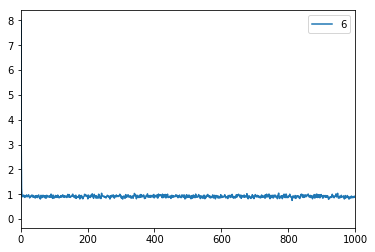

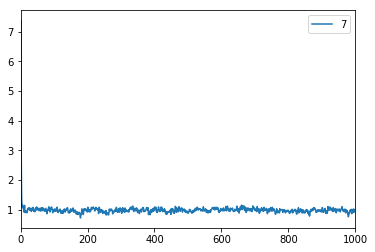

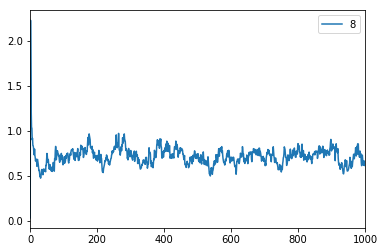

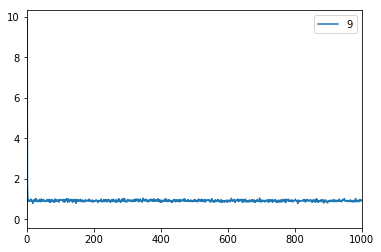

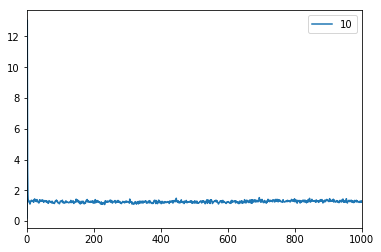

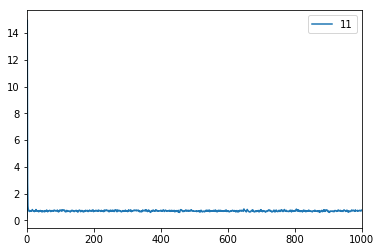

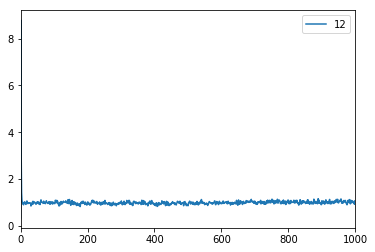

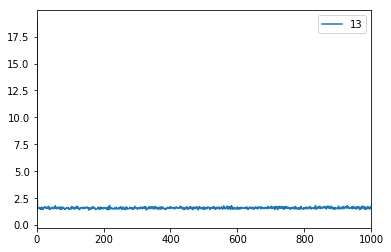

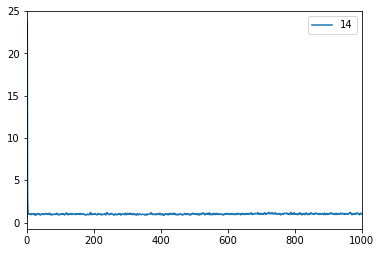

In [11]:
a = pd.DataFrame(gs.Sigma_list)

for i in range(15):
    a.plot(x=a.index, y =i)

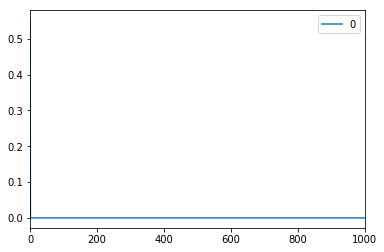

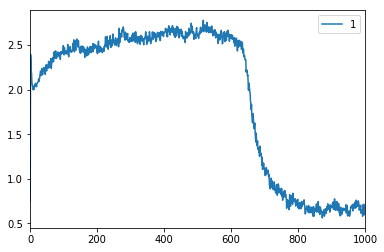

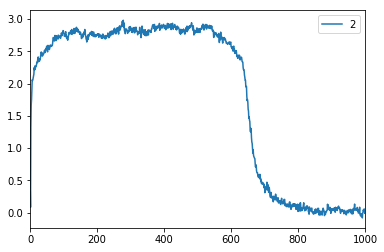

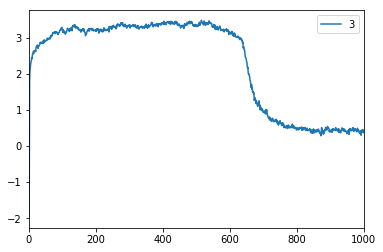

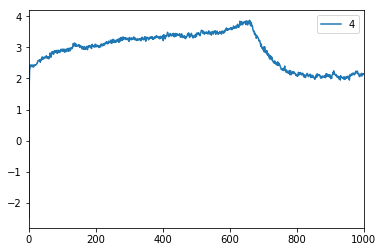

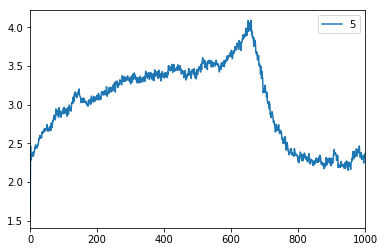

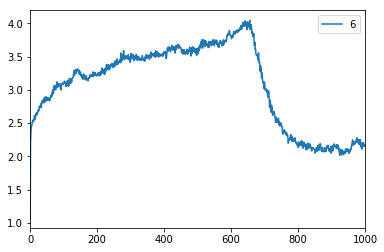

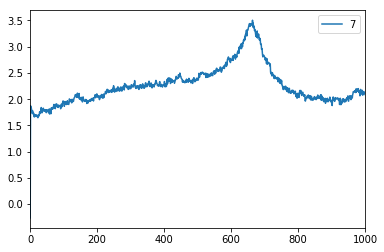

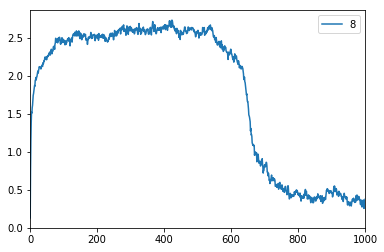

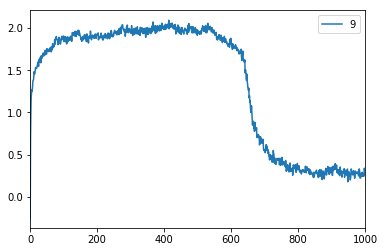

In [12]:
k = [np.squeeze(np.asarray(beta[:,[1]])) for beta in gs.Beta_list]
b = pd.DataFrame(k)

for i in range(10):
    b.plot(x=b.index, y=i)

In [13]:
factors = pd.DataFrame(gs.F)
names = pd.Series([party_name_from_key(label) for label in labels])
factors['party_names'] = names


In [14]:
set(names)

{'Alternativet',
 'Dansk Folkeparti',
 'Det Konservative Folkeparti',
 'Enhedslisten - De Rød-Grønne',
 'Liberal Alliance',
 'Nye Borgerlige',
 'Radikale Venstre',
 'SF - Socialistisk Folkeparti',
 'Socialdemokratiet',
 'Venstre, Danmarks Liberale Parti'}

In [15]:
tmp = factors.loc[(factors['party_names'] == 'Venstre, Danmarks Liberale Parti') | (factors['party_names'] == 'Socialdemokratiet')]
                                                                                      
                                                                                      
                                                                                      
                                                                                      

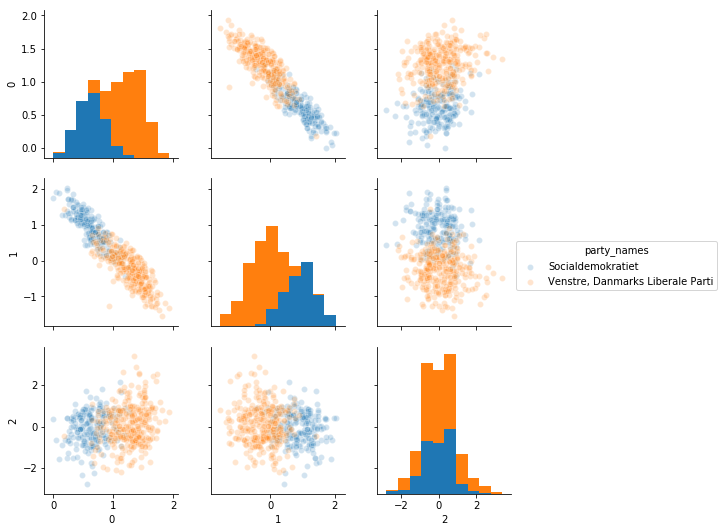

In [16]:
tmp = factors.loc[(factors['party_names'] == 'Venstre, Danmarks Liberale Parti') | (factors['party_names'] == 'Socialdemokratiet')]
sbn.pairplot(tmp, hue='party_names', plot_kws={'alpha': 0.2})

In [ ]:
tmp = factors.loc[(factors['party_names'] == 'Radikale Venstre') | (factors['party_names'] == 'Dansk Folkeparti')]
sbn.pairplot(tmp, hue='party_names', plot_kws={'alpha': 0.2})